In [17]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import json
df = pd.read_csv('C:\\Users\\vishw\\SIH\\ml\\YouTube Trend Analysis\\Data\\US_youtube_trending_data.csv')
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [18]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])
df['like_ratio'] = df['likes'] / (df['view_count']+1)
df['comment_ratio'] = df['comment_count'] / (df['view_count']+1)
df['description'] = df['description'].fillna(0)
df['like_ratio'] = df['like_ratio'].fillna(0)
df['comment_ratio'] = df['comment_ratio'].fillna(0)
df['published_hour'] = df['publishedAt'].dt.hour
df['published_day'] = df['publishedAt'].dt.day_name()
df['published_weekday'] = df['publishedAt'].dt.weekday 



In [19]:
#Mapping of category id to name
with open(
    'C:\\Users\\vishw\\SIH\\ml\\YouTube Trend Analysis\\Data\\US_category_id.json',
    encoding='utf-8'
) as f:
    categories = json.load(f)

category_map = {}

for item in categories['items']:
    categoryId = int(item['id'])
    category_name = item['snippet']['title']
    category_map[categoryId] = category_name

df['category_name'] = df['categoryId'].map(category_map)



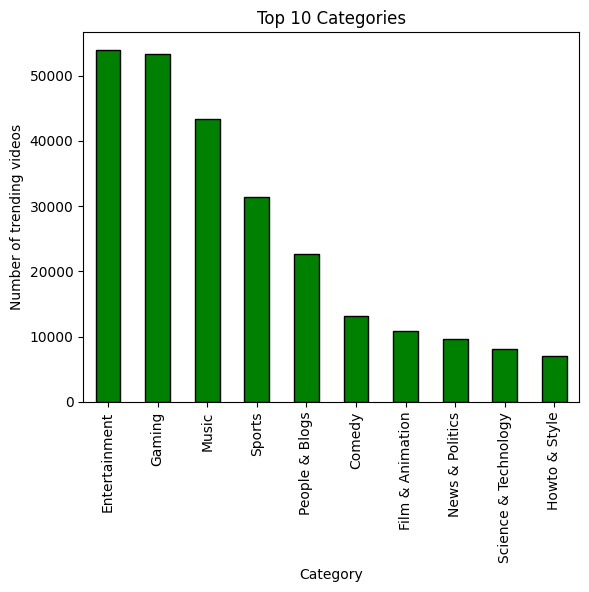

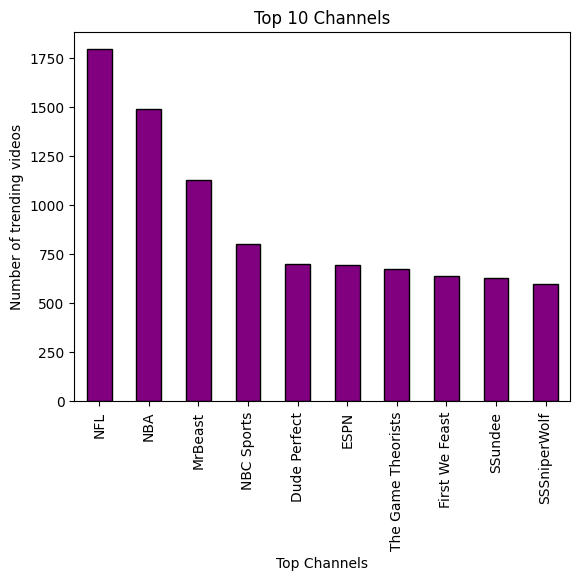

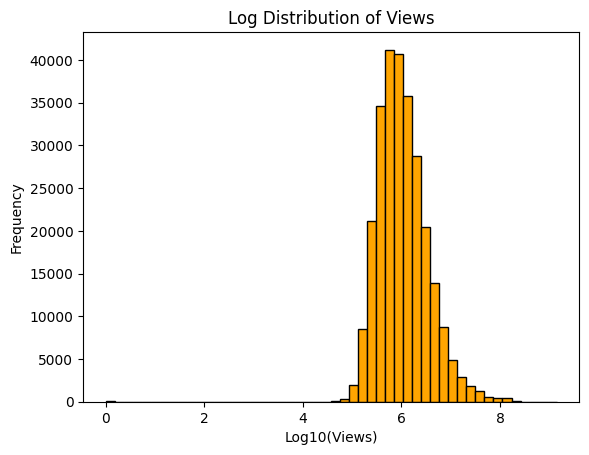

In [20]:
#Plotting
top_categories = df['category_name'].value_counts().head(10)
top_categories
top_categories.plot(kind='bar', title='Top 10 Categories',color = 'Green',edgecolor= 'black')
plt.xlabel('Category')
plt.ylabel('Number of trending videos')
plt.show()
top_channels = df['channelTitle'].value_counts().head(10)
top_channels
top_channels.plot(kind='bar', title='Top 10 Channels', color='purple', edgecolor= 'black')
plt.xlabel('Top Channels')
plt.ylabel('Number of trending videos')
plt.show()
df['view_count'].describe()
plt.hist(np.log10(df['view_count'] + 1), bins=50, color='orange', edgecolor='black')
plt.title('Log Distribution of Views')
plt.xlabel('Log10(Views)')
plt.ylabel('Frequency')
plt.show()

Insights:
    Top 10 Categories:
            Entertainment, Gaming, and Music account for the majority of trending videos.

            These categories are highly consumable and appeal to a broad audience, increasing their likelihood of trending.

            Informational categories such as Science & Technology and How to & Style appear less frequently, suggesting lower volume but not necessarily lower quality.

            Trending is largely driven by mass-appeal content rather than niche topics.
    
    Top 10 Channels:
            A small number of channels (such as NFL, NBA, and MrBeast) dominate the trending list.

            This indicates that trending visibility is not evenly distributed across creators.

            Established channels with large subscriber bases and frequent uploads are more likely to appear repeatedly in trending.

            Trending success is influenced by brand power and consistency, not just individual viral videos.        
    
    Log Distribution Of Views:
        The log scaled histogram shows that views follow a right-skewed distribution.

        Most trending videos receive views in the mid range, while a small number of viral videos achieve extremely high view counts.

        Applying a logarithmic transformation makes the distribution more interpretable by reducing the impact of extreme outliers.

        This confirms that viral success on YouTube is rare and unevenly distributed.


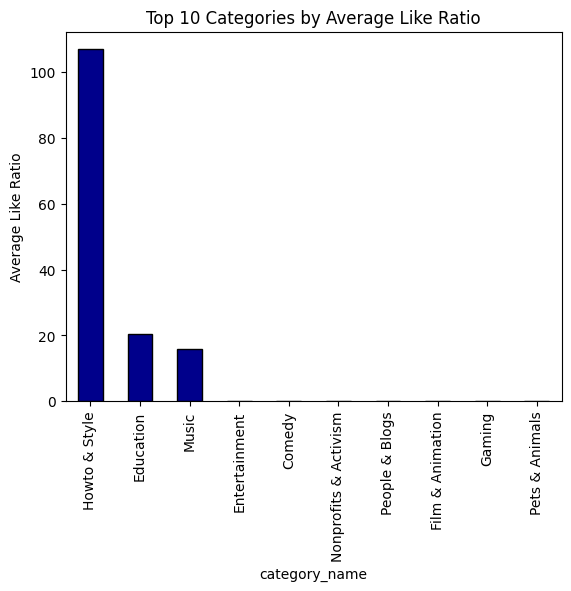

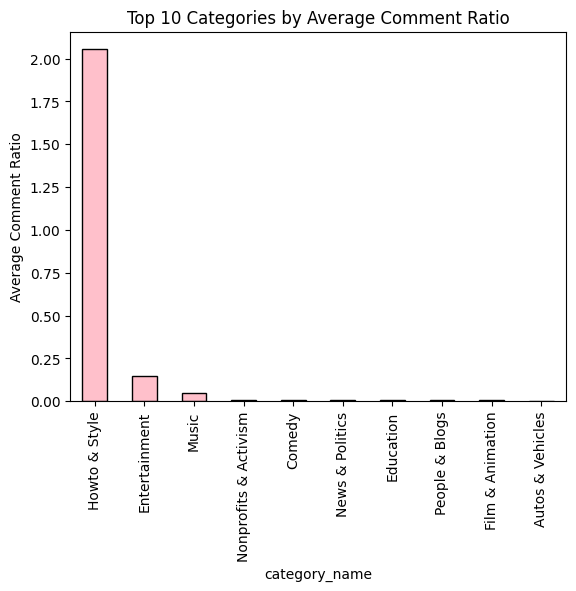

,like_ratio,comment_ratio
category_name,,
Howto & Style,106.946684,2.054745
Education,20.443658,0.004534
Music,15.748265,0.047262
Entertainment,0.211351,0.149213
Comedy,0.075503,0.004941
Nonprofits & Activism,0.064725,0.006652
People & Blogs,0.061696,0.004489
Film & Animation,0.057319,0.004437
Gaming,0.052490,0.004065


In [21]:
df.columns
avg_like_ratio=(
    df.groupby('category_name')['like_ratio']
    .mean().sort_values(ascending=False)
)
avg_like_ratio.head(10).plot(
    kind='bar', color='darkblue', edgecolor='black', title='Top 10 Categories by Average Like Ratio'
)
plt.ylabel('Average Like Ratio')
plt.show()
avg_comment_ratio=(
    df.groupby('category_name')['comment_ratio'].mean().sort_values(ascending=False)
)
avg_comment_ratio.head(10).plot(kind='bar', color='pink', edgecolor='black', 
     title='Top 10 Categories by Average Comment Ratio')
plt.ylabel('Average Comment Ratio')
plt.show()
engagement_summary = df.groupby('category_name')[['like_ratio', 'comment_ratio']].mean()
engagement_summary.sort_values(by='like_ratio',ascending=False).head(10)


Insights:
    
    Top 10 Categories By Avg Like Ratio:
        
        Categories like How to & Style, Education, and Music show higher average like ratios.

        This suggests that although these categories trend less often, viewers who watch them are more engaged per view.

        High engagement does not always correlate with high view counts.

        Engagement ratio is a better indicator of content quality and audience satisfaction than raw popularity.
    
    Top 10 Categories By Avg Comment Ratio:    
        
        How to & Style stands out with a significantly higher comment ratio compared to other categories.

        This indicates that instructional and problem-solving content encourages active interaction, such as asking questions or sharing experiences.

        Most entertainment-focused categories show low comment ratios, suggesting more passive consumption.

        Comments represent deeper engagement than likes and highlight categories that promote discussion.

Overall Insight:
    
    While Entertainment and Gaming dominate trending in terms of volume, categories such as Education and How to & Style demonstrate stronger engagement per viewer. 
    
    This highlights that trending popularity and audience engagement are driven by different factors, and creators should focus not only on reach but also on meaningful interaction.


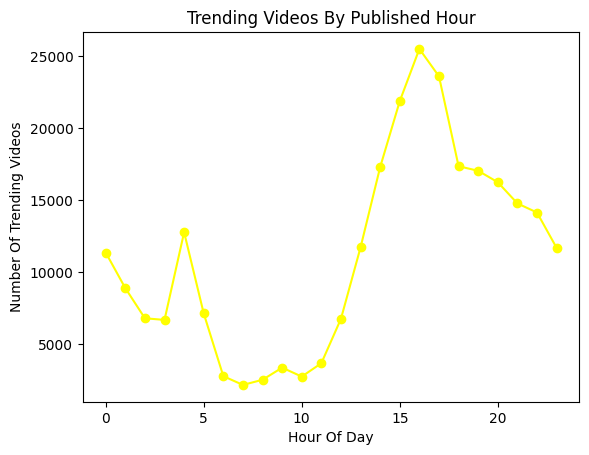

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'like_ratio', 'comment_ratio',
       'published_hour', 'published_day', 'published_weekday',
       'category_name'],
      dtype='object')

In [22]:

hourly_trends = df['published_hour'].value_counts().sort_index()
hourly_trends
hourly_trends.plot(kind='line', color='yellow', marker='o', title='Trending Videos By Published Hour')
plt.xlabel('Hour Of Day')
plt.ylabel('Number Of Trending Videos')
plt.show()
df.columns

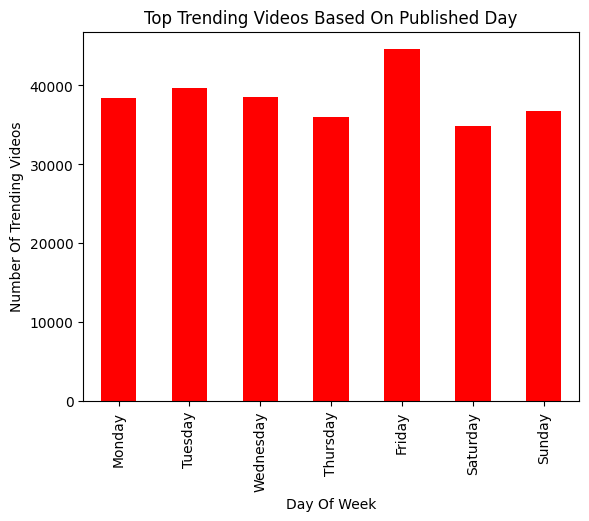

In [23]:
day_trends = df['published_day'].value_counts()
day_trends
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_trends = day_trends.reindex(order)
day_trends.plot(kind='bar', color='red', title='Top Trending Videos Based On Published Day' )
plt.xlabel('Day Of Week')
plt.ylabel('Number Of Trending Videos')
plt.show()

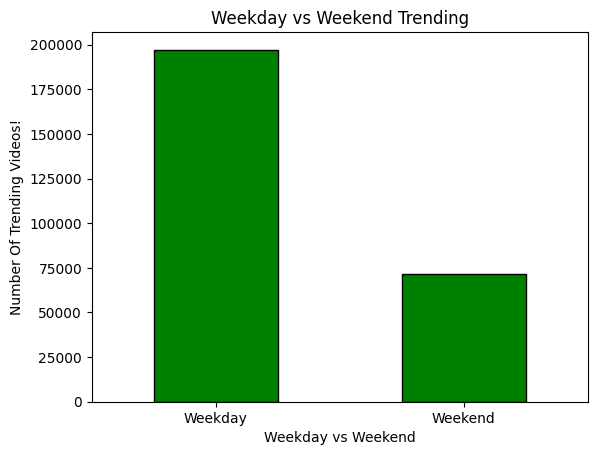

In [24]:
df['is_Weekend'] = df['published_weekday']>=5
df['is_Weekend'].value_counts().plot(kind='bar',title='Weekday vs Weekend Trending',color='green',edgecolor='black')
plt.xticks([0, 1], ['Weekday', 'Weekend'],rotation=0)
plt.xlabel('Weekday vs Weekend')
plt.ylabel('Number Of Trending Videos!')
plt.show()

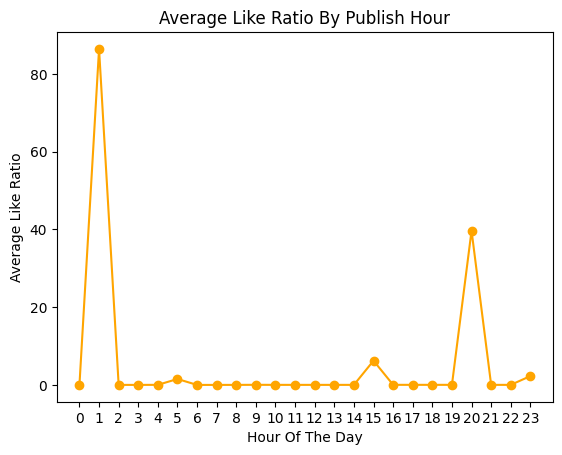

In [31]:
hourly_engagement = df.groupby('published_hour')['like_ratio'].mean()
hourly_engagement.plot(kind='line', marker='o', color='orange', title='Average Like Ratio By Publish Hour')
plt.xticks(range(0,24,1))
plt.xlabel('Hour Of The Day')
plt.ylabel('Average Like Ratio')
plt.show()

Trending Videos By Published Hour:
        
        Trending videos are most frequently published during late afternoon and early evening hours. This suggests that content released during this window benefits from higher 
        user activity and faster initial traction, which may increase its chances of trending.

Top Trending Videos Based On Published Day:
        
        Friday stands out as the most common publish day for trending videos, likely due to increased viewer availability ahead of the weekend. Weekdays overall contribute more trending videos than weekends, indicating that creators tend to publish strategically before peak consumption periods.

Weekday vs Weekend Trending:

        A significantly higher number of trending videos are published on weekdays compared to weekends. This suggests that creators and media organizations prefer weekday publishing schedules, likely to align with consistent audience engagement and platform algorithms.

Average Like Ratio By Publish Hour:

        While certain hours show unusually high average like ratios, these spikes are likely influenced by a small number of videos and should be interpreted cautiously. Overall, engagement ratios appear relatively stable across most hours, suggesting that publish time affects visibility more than per-viewer engagement quality.  

Summary:

        Time based analysis reveals that late afternoon and early evening hours are the most common publishing window for trending videos. Fridays emerge as the strongest day for trending activity, while weekdays overall dominate in volume due to higher publishing frequency. Although engagement ratios show some variation by hour,these differences are noisy and less consistent than trending volume, indicating that publish timing primarily influences reach rather than engagement depth.              

Findings:

    For Content Creators:

        Publish during late afternoon / early evening to maximize early traction.

        Focus on engagement quality, not just views — especially for educational or instructional content.

        Avoid overly crowded peak hours if engagement quality is the goal.

     For Media Teams / Brands:

        Schedule major releases on Fridays to capture pre-weekend attention.

        Leverage weekday publishing for consistent visibility.

        Combine timing strategy with category-specific engagement behavior.

    For Platform Analysis

        Trending algorithms appear to favor both volume and early engagement.

        Engagement normalization (ratios) provides better insight than raw metrics.